# Guided Project : Clean and Analyze Employee Exit Surveys 

## Introduction

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We'll play the role of data analyst and pretend our stakeholders want answers to the following question:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Summary

The analysis of both the DETE and TAFE surveys dataset led us to the following conclusions:
- Employees who have been in the company for a longer period of time are more likely to resign due to some kind of dissatisfaction with their work situation.
- Younger employees (younger than 26yo) seem less likely to resign due to some kind of dissatisfaction than the rest.
- Although no particular age category stands out form the rest, it seems that employees aged 26-30yo and 51+ have a slightly higher chance of resigning due to dissatisfaction.

## The Data

The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

Dataquest made some slight modifications to these datasets to make them easier to work with, including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`).

They want us to combine the results for both surveys to answer these questions. However, although both used the same template, one of them customized some of the answers.

No data dictionnary was provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll us our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:
- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:
- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## Librairies import and data reading

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('white')
%matplotlib inline

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

## Initial Data Exploration

We start by exploring the two datasets briefly to figure out the amount of data cleaning that will be needed.

### The DETE survey

Let's start by exploring the DETE survey dataset. For that, we print the first five rows of it and call the info() method on it.

In [58]:
pd.options.display.max_columns = 150 # to avoid truncated output
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [59]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

Based on the results returned above, we can make the following observations on this dataset:
- it contains 822 entries for a total of 56 columns.
- its 56 columns are of 3 different data types: numeric type (`ID` column of type `int64`), boolean type (18 columns) and string type (37 columns).
- the different columns feature names formatted in a different way.
- it contains many columns that we won't need to complete our analysis.
- more than half of the columns are missing data, to different degrees.
- some columns contain 'Not Stated' values that indicate values are missing but they aren't represented and counted as NaNs.

Let's print the number of null values per column sorted in descending order.

In [60]:
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Performance of supervisor                9
Initiative 

As we can see in the Series object above, 7 columns feature around or more than half of NaN values. These columns are the following:
- `Torres Strait`
- `South Sea`
- `Aboriginal`
- `Disability`
- `NESB`
- `Business Unit`
- `Classification`

The `Classification` column features significantly less NaN values than the other six, with 367 out of 822 total data points.

In the next sections, we will analyze these columns further and decide how we deal with them.

But next, we do the same exploration work on the TAFE survey.

### The TAFE survey

As we did previously for the DETE survey, we now explore the TAFE survey dataset.

In [61]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [62]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Based on the results returned above, we can make the following observations on this dataset:
- it contains 702 entries for a total of 72 columns.
- its 72 columns are of 2 different data types: numeric type (`Record ID` and `CESSATION YEAR` columns of type `float64`) string type (70 columns).
- the columns names don't respect a similar format convention and some of them are very long.
- many columns of this dataset are similar to the ones from the DETE survey dataset but with different names.
- Most columns seem to contain null values.

Let's check the number of null values per column sorted in descending order.

In [63]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor. Which of these was the main factor for leaving?                                                                                                     589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Ill Health                                                                                                                                 265
Contributing Factors. Maternity/Family                                                                                                                           265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributing Factors. NONE                                                                                                                                       265
Contributi

All but 3 columns feature null values.

Contrary to the DETE survey dataset where a few columns contained a high number of null values, we observe here that most columns contain null values but in lower proportions.

In the next section, strong of the observations made thus far, we clean and transform the two datasets to make them more usable.

## Data Cleaning and Preparation

As we saw in the initial data exploratory step, a few steps need to be taken to clean and reshape the data.

To sum it up, here are the big steps we need to take:
- address the 'Not Stated' values in the DETE survey dataset
- more generally, address the null values in both datasets (do we want the values replaced? the rows deleted? the columns dropped?)
- get rid of columns and rows we don't need for our analysis
- rename columns with a similar formatting and naming convention for both datasets

### Importing the 'Not Stated' values as NaNs

To deal with the 'Not Stated' values of the DETE survey dataset, we read the data again but this time specifying the 'Not Stated' value in the parameter `na_values`. 

In [64]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [65]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We can see that the 'Not Stated' values were correctly replaced by NaNs.

Next, we look at the relevance of each column and get rid of some of them to make our datasets more manageable. 

### Getting rid of irrelevant columns

In the light of what we are trying to analyse and the questions we would like to answer, the following columns don't seem of any relevance.

In [66]:
print(dete_survey.columns[28:49])
print('\n')
print(tafe_survey.columns[17:66])

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')


Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the

We decide to drop these columns.

In [67]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In the next section, we turn our attention to the column names.

### Renaming the columns

Each dataframe contains many similar columns but with different names.

We start by renaming the columns of the `dete_survey_updated` dataframe.

In [68]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


For the columns of the `tafe_survey_updated` dataframe, we use the `rename()` method to make its column's name coincide with the ones of the dete_survey_updated dataframe.

In [69]:
cols_map = {'Record ID':'id','CESSATION YEAR':'cease_date','Reason for ceasing employment':'separationtype','Gender. What is your Gender?':'gender','CurrentAge. Current Age':'age','Employment Type. Employment Type':'employment_status','Classification. Classification':'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(cols_map,axis=1)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


The columns name have been correctly modified in each dataset. 

The columns of the `tafe_survey_updated` dataframe beginning with 'Contributing Factors.' will be handled later.

In the next section, we remove more of the data that we don't need.

### Filtering data on `separationtype`

The goal of this project is to answer the following question:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who _resigned_, so their separation type contains the string 'Resignation'.

The `dete_survey_updated` dataframe contains multiple separation types with the string 'Resignation':
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We have to account for each of these variations so we don't unintentionally drop data.

Let's start by reviewing the unique values in the `separationtype` column in both dataframes.

In [70]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [71]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In each dataframe, we select only the data for survey respondents who have a `Resignation` separation type.

In [72]:
# We update all the separation types containing "resignation" to "Resignation"
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [73]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=="Resignation"].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=="Resignation"].copy()

### Verification of date values

In this step, we focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

Let's first check the unique values of the `cease_date` column and their counts.

In [74]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

As we can see, the date values (string type objects) don't respect an homogeneous format.

We use a vectorized string methods below to extract the year.

In [75]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str[-4:].astype(float)
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

The `cease_date` column is now correctly formatted. 

It contains values spanning over 7 years, from 2006 to 2013.
It shows a significantly higher number of resignations during the years 2012 and 2013. For the year 2014, only 22 resignations were recorded.
Looking at the DETE survey webpage, we can see that it was created in March of 2014 and we can infer that the survey was released around that date. That would explain the lower number of resignations recorded for that year.

Now, let's have a look at the `dete_start_date` column.

In [76]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

This shows starting dates spanning over a period of 48 years, from 1963 to 2013.
A significant increase in hirings happens from 2004 and continues up to 2013.

Let's now look at the `cease_date` column of the `tafe_resignations` dataframe.

In [77]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

The years featured in the DETE survey don't completely align with those in the TAFE survey.
The TAFE survey contains data points for the year 2009 while the DETE doesn't.
For the year 2010 however, both surveys feature data points but the number of resignations are really different (2 resignations in 2010 for the DETE survey and 68 for the TAFE survey).

As we won't use the year data as a predictor or a variable in our analysis, we will leave these columns like this.

Overall, no major issues were observed in these two columns. No further cleaning is needed.

In the following section, we calculate the length of service of each employee from the `dete_resignations` dataframe and create a new column for it.

### Calculation of the length of service

Recall that our end goal is to answer the following question:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The `tafe_resignation` dataframe already contains a `service` column, which we renamed to `institute_service`. 

In order to analyse both surveys together, we need to create a corresponding `institute_service` column in `dete_resignations`.

For that, we subtract the `dete_start_date` from the `cease_date` and assign the result to a new column named `institute_service`.

In [78]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations["institute_service"].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

The column `institute_service` was correctly created.
We can already see that there are an important number of employees that have been here less than 10 years.
We will analysis this variable further in later sections.

Let's check the `institute_service` column from the `tafe_resignations` dataframe to make sure the data are correct.

In [79]:
tafe_resignations["institute_service"].value_counts().sort_index(ascending=False)

More than 20 years    10
Less than 1 year      73
7-10                  21
5-6                   33
3-4                   63
11-20                 26
1-2                   64
Name: institute_service, dtype: int64

We leave this column as is and will modify it after we merge both dataframes.

Next, we'll identify any employees who resigned because they were dissatisfied.

### Cleaning of the `age` columns

One of the questions being to evaluate the impact of employees age on reasons for their resignation, we decide to have a look at and clean the `age` column in both datasets.

We first list all the unique values of age in the DETE survey and their counts.

In [80]:
dete_resignations["age"].value_counts(dropna=False).sort_values(ascending=False)

41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
21-25            29
31-35            29
56-60            26
61 or older      23
NaN               5
20 or younger     1
Name: age, dtype: int64

Ages are here indicated as age brackets.
We can also see 5 missing values.

Let's look at the TAFE survey age values.

In [81]:
tafe_resignations["age"].value_counts(dropna=False).sort_values(ascending=False)

NaN              50
41  45           45
46  50           39
51-55            39
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
20 or younger     9
Name: age, dtype: int64

Similarly to the DETE survey dataset, ages are also here indicated as age brackets. The 5 years ranges are almost similar to the other dataset.
In the DETE survey, the two upper ranges are 56-60 and 61+, whereas the upper range in the TAFE survey is 56+.

We decide to retain the following shared age categories for both datasets:
- <20
- 21-25
- 26-30
- 31-35
- 36-40
- 41-45
- 46-50
- 51-55
- 56+

Before categorizing, we need to reformat the data.

We modify the string values in order to only retain the lower age limit, or the value 20 for the "20 or younger" values. 

In [82]:
dete_resignations['age'] = dete_resignations["age"].str.replace('or older','').str.replace('or younger','').str.split('-').str[0].str.strip()
dete_resignations['age'] = dete_resignations['age'].astype(float)
dete_resignations['age'].value_counts(dropna=False).sort_index()

 20.0     1
 21.0    29
 26.0    35
 31.0    29
 36.0    41
 41.0    48
 46.0    42
 51.0    32
 56.0    26
 61.0    23
NaN       5
Name: age, dtype: int64

In [83]:
tafe_resignations["age"] = tafe_resignations["age"].str.replace('or older','').str.replace('or younger','').str.strip().str.replace('  ','-').str.split('-').str[0]
tafe_resignations["age"] = tafe_resignations["age"].astype(float)
tafe_resignations["age"].value_counts(dropna=False).sort_index()

 20.0     9
 21.0    33
 26.0    32
 31.0    32
 36.0    32
 41.0    45
 46.0    39
 51.0    39
 56.0    29
NaN      50
Name: age, dtype: int64

The `age` column is now reformatted. 
We can see that both columns from each dataset contain NaN values. 
We calculate the proportion of these values to the total number of data points.

In [84]:
# Total number of data points
combined_length = len(dete_resignations)+len(tafe_resignations)
print(combined_length)

651


In [85]:
# Number of missing age values
unknown_age = dete_resignations['age'].isnull().sum()+tafe_resignations['age'].isnull().sum()
print(unknown_age)

55


In [86]:
# Percentage of missing values on total
round((unknown_age/combined_length)*100,1)

8.4

The number of missing age values being below 10% of the total number of data points, we decide to drop these rows.

In [87]:
print('Number of datapoints in dete_resignations before drop:',len(dete_resignations))
dete_resignations.dropna(axis=0,subset=["age"],inplace=True)
print('Number of datapoints in dete_resignations after drop:',len(dete_resignations))

Number of datapoints in dete_resignations before drop: 311
Number of datapoints in dete_resignations after drop: 306


In [88]:
print('Number of datapoints in tafe_resignations before drop:',len(tafe_resignations))
tafe_resignations.dropna(axis=0,subset=["age"],inplace=True)
print('Number of datapoints in tafe_resignations after drop:',len(tafe_resignations))

Number of datapoints in tafe_resignations before drop: 340
Number of datapoints in tafe_resignations after drop: 290


Now the rows containin NaN values for age are dropped, we can modify the `age` column from both dataframe to map to the new categories.

In [89]:
def age_categorization(x):
    if x == 20:
        return '<20'
    elif x == 21:
        return '21-25'
    elif x == 26:
        return '26-30'
    elif x == 31:
        return '31-35'
    elif x == 36:
        return '36-40'
    elif x == 41:
        return '41-45'
    elif x == 46:
        return '46-50'
    elif x == 51:
        return '51-55'
    else:
        return '56+'

dete_resignations['age'] = dete_resignations['age'].apply(age_categorization)
tafe_resignations['age'] = tafe_resignations['age'].apply(age_categorization)

print('Value counts of age categories from the DETE survey')
print(dete_resignations['age'].value_counts())
print('\n')
print('Value counts of age categories from the TAFE survey')
print(tafe_resignations['age'].value_counts())

Value counts of age categories from the DETE survey
56+      49
41-45    48
46-50    42
36-40    41
26-30    35
51-55    32
31-35    29
21-25    29
<20       1
Name: age, dtype: int64


Value counts of age categories from the TAFE survey
41-45    45
46-50    39
51-55    39
21-25    33
26-30    32
31-35    32
36-40    32
56+      29
<20       9
Name: age, dtype: int64


The `age` columns are now ready for analysis.

In the next section, we continue our data cleaning and preparation process and create a `dissatisfied` column to categorize employees who expressed a dissatisfaction on at least one factor.

### Creation of a `dissatisfied` column

In this section, we want to identify any employees who resigned because they were dissatisfied.

In both surveys, employees were asked their satistaction on a certain number of factors (lack of recognition, work environment, work location, ...).

We want to use these factors to categorize employees as globally stastified or dissatisfied. Below are the columns we'll use from each dataframe to categorize each employee's satisfaction.

- TAFE survey:
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction`

- DETE survey:
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_environment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

From observing the DETE survey dataset, we know that its columns mentioned above contain booleans, with 'True' meaning a dissatisfaction and 'False' meaning no dissatisfaction.

In our new `dissatisfied` column, we will then add a 'True' value if any of the columns listed above contain a `True` value. We will do the following:
- Return `True` if any element in the selected columns above is `True`
- Return `False` if any element in the selected columns above is `True`
- Return `Nan` if the value is `Nan`

But before we create and populate that new column, let's have a look at the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns from the `tafe_survey_updated` dataframe to see which values they contain.

In [90]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         247
Contributing Factors. Dissatisfaction      43
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [91]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      235
Job Dissatisfaction     55
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

As we can see, each column contains only two unique values, to show either statisfaction (the '-' symbole) or dissatisfaction.

To make these two columns usable, we convert these values to booleans. We create a function to update their values to either `True`, `False` or `Nan` depending on the columns current values.

In [92]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

False    247
True      43
Name: Contributing Factors. Dissatisfaction, dtype: int64


False    235
True      55
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


The column values were correctly converted to booleans.
A 'True' value means dissatisfaction whereas a 'False' value means no dissatisfaction.

We can now create the `dissatisfied` column for each dataset.

In [93]:
# Creating the dissatisfied columns based on the selected factors values
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department',
                                                     'physical_work_environment','lack_of_recognition',
                                                     'lack_of_job_security','work_location','employment_conditions',
                                                     'work_life_balance','workload']].any(axis=1,skipna=False)

# Creating a copy of the updated dataframe
dete_resignations_up = dete_resignations.copy()

# Checking the values counts for the dissatisfied column
dete_resignations['dissatisfied'].value_counts()

False    157
True     149
Name: dissatisfied, dtype: int64

In [94]:
# Creating the dissatisfied column based on the selected factors values
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1,skipna=False)

# Creating a copy of the updated dataframe
tafe_resignations_up = tafe_resignations.copy()

# Checking the values counts for the dissatisfied column
tafe_resignations['dissatisfied'].value_counts()

False    213
True      77
Name: dissatisfied, dtype: int64

To recap, we've accomplished the following:
- Renamed the columns
- Dropped any data not needed for our analysos
- Verified the quality of our data
- Created a new `institute_service` column
- Cleaned the `Contributing Factors` columns
- Created a new column indicating if an employee resigned because it was dissatisfied in some way

We are now ready to combine our datasets. Our end goal is to aggregate the date according to the `institute_service` column.


### Combination of the datasets

We start by adding a column named `institute` containing either 'DETE' or 'TAFE' to each dataframe, which will allow us to easily distinguish between the two.

In [95]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

We then combine the dataframes.

In [96]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True)

Let's verify the number of non null values in this new combined dataframe.

In [97]:
combined.notnull().sum().sort_values(ascending=False)

age                                                    596
institute                                              596
separationtype                                         596
dissatisfied                                           596
id                                                     596
employment_status                                      594
position                                               593
gender                                                 590
cease_date                                             583
institute_service                                      561
ill_health                                             306
employment_conditions                                  306
work_location                                          306
job_dissatisfaction                                    306
dissatisfaction_with_the_department                    306
career_move_to_public_sector                           306
career_move_to_private_sector                          3

Many columns in this dataframe are not needed to complete our analysis. We choose to drop any columns with less than 500 non null values.

In [98]:
combined_updated = combined.dropna(thresh=500,axis=1).copy()

Next, we take a look back at the `institute_service` column as it still contains values in a couple of different forms.

### Cleaning of the `institute_service` column

Let's have a look at the unique values of the `institute_service` column.

In [99]:
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 13.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In order to perform some kind of analysis, we need to convert these numbers into categories. For that, we'll base our analysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

First, we extract the years of service from each value in the `institute_service` column.

In [100]:
# Extracting the years of service for each value
combined_updated['institute_service_updated'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)')

# Converting the values to float type
combined_updated['institute_service_updated'] = combined_updated['institute_service_updated'].astype(float)

Next, we map each value to one of the career stage definitions above.

We create a function that maps each year value to one of the career stages.

In [101]:
def career_stage_mapping(x):
    if x < 3:
        return 'New'
    elif x < 7:
        return 'Experienced'
    elif x < 11:
        return 'Established'
    elif pd.isnull(x):
        return np.nan
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service_updated'].apply(career_stage_mapping)

In [102]:
combined_updated['service_cat'].value_counts()

New            192
Experienced    172
Veteran        135
Established     62
Name: service_cat, dtype: int64

The years of service values have been correctly categorized.

The cleaning part of the project is now done. We can move on to analysing our data further to answer our initial questions.

## Data analysis

Now, let's do our first piece of analysis!

We want to answer the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In our data cleaning section, we created the `dissatisfied` column and categorized employees into 4 categories for lengths of service and 9 categories for age to help us answer these questions.

### Impact of length of service on dissatisfaction related resignation

In this first section, we evaluate the impact of the length of service of employees on the reasons for their resignation.
In other words, we want to know if employees who have been in the company longer have higher chances to resign due to a dissatisfaction linked to their work.

Recall that the `dissatisfied` column consists of Boolean values. A 'True' value means that the employee expressed a dissatisfaction linked to at least one factor.

Let's start by checking the value counts of the `dissatisfied` column from the `combined_updated` dataframe.

In [103]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    370
True     226
Name: dissatisfied, dtype: int64

We observe 8 NaN values for a total of 651 data points. We replace these 8 missing data points in the `dissatisfied` column with the value that occurs most frequently in this column, 'False'.

In [104]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(value=False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    370
True     226
Name: dissatisfied, dtype: int64

We can now use the `pivot_table()` method to calculate the percentage of dissatisfied employees in each `service_cat` group.

In [105]:
service_cat_dissatisfied = combined_updated.pivot_table(values='dissatisfied',index='service_cat')
service_cat_dissatisfied

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.296875
Veteran,0.488889


Let's plot the results from the table above in a bar chart.

In [106]:
# Ordered list of the length of service categories for barplot x labels ordering
list_order = ['New','Experienced','Established','Veteran']

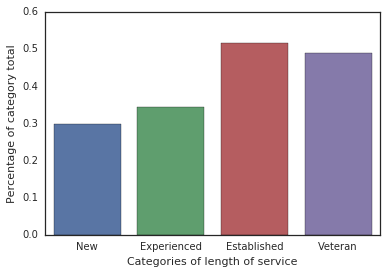

In [107]:
df = service_cat_dissatisfied.loc[list_order]
ax = sns.barplot(x=df.index, y='dissatisfied', data=df)
ax.set(xlabel='Categories of length of service',ylabel='Percentage of category total')

From analysing the graph above, we can conclude that:
- employees with 7 years of service or more (Established and Veterans) are more likely to resign due to some kind of dissatisfaction linked to the job than the rest of the employees (with less than 7 years of service).
- around half of resigning employees from the categories Established and Veterans expressed that a dissatisfaction was causing their resignation.
- for employees who have spent less time in the company (New and Experienced categories), only around 30% of them resigned due to some dissatisfaction.

In the second and last section, we look at the impact of employees age on their reasons for resigning.

### Impact of age on dissatisfaction related resignation

In this section, we want to evaluate if employees age is correlated with the percentage of them that resign due to dissatisfaction.

In the data cleaning section, employees were categorized into 9 distinct categories of age.

We first check the counts of employees per age categories.

In [108]:
age_cat_counts = combined_updated.groupby('age').size()
age_cat_counts

age
21-25    62
26-30    67
31-35    61
36-40    73
41-45    93
46-50    81
51-55    71
56+      78
<20      10
dtype: int64

We plot this distribution in a bar chart for better visualization.

In [109]:
# Ordered list of the age categories for barplot x labels ordering
list_order = ['<20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56+']

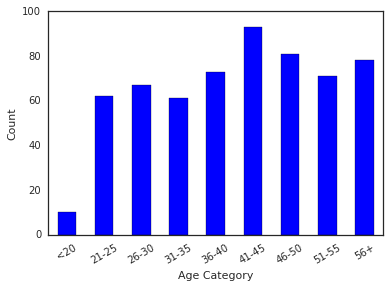

In [110]:
age_cat_counts.loc[list_order].plot(kind='bar',rot=30,color='blue')
plt.xlabel('Age Category')
plt.ylabel('Count')

From observing the plot above, we can make the following obdservations:
- the age category being the most represented is the 41-45yo category. 
- on the younger end of the spectrum, only about 10 employees are 20 or younger. 
- for the rest, the distribution, though not being flat, reassures us that no category is over or sub-represented.

We now plot the percentage of resignations due to dissatisfaction per age category.

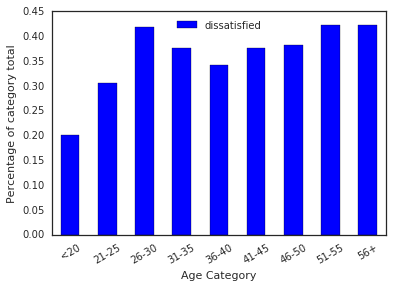

In [111]:
combined_updated.pivot_table(values='dissatisfied',index='age').loc[list_order].plot(kind='bar',rot=30,color='blue')
plt.xlabel("Age Category")
plt.ylabel('Percentage of category total')

From analysing the graph above, we can make the following observations:
- no particular age category stands out from the rest.
- the 26-30yo age category has a slightly higher percentage of resignations due to dissatisfactions.
- the 51-55yo and 56+ age categories also rise at similar levels.
- employees younger than 26 resign mostly for reasons other than a dissatisfaction linked to work.
- however, the <20 age category containing only 10 data points, caution needs to be taken when making any conclusions on reasons of resignation for this age range. 
- employees from these younger categories may want to move quickly after a first work experience, regardless of the global quality of their situations.

## Conclusion

The analysis of both the DETE and TAFE surveys dataset led us to the following conclusions:
- Employees who have been in the company for a longer period of time are more likely to resign due to some kind of dissatisfaction with their work situation.
- Younger employees (younger than 26yo) seem less likely to resign due to some kind of dissatisfaction than the rest.
- Although no particular age category stands out form the rest, it seems that employees aged 26-30yo and 51+ have a slightly higher chance of resigning due to dissatisfaction.